E para regressão como fica? Exercício para casa! Use o dataset abaixo e escolha um modelo de sua preferência para fazer as análises de interpretabilidade.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
def interpreta_arvore(tree, X_test, idx):
    
    node_indicator = tree.decision_path(X_test)
    leaf_id = tree.apply(X_test)
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    node_index = node_indicator.indices[node_indicator.indptr[idx] : node_indicator.indptr[idx + 1]]
    
    print(f"{idx+1}a observação de teste:")
    display(X_test.iloc[[idx]])

    print("="*50)
    print("Regras utilizada em cada nó percorrido da árvore:\n")

    feature_names = tree.feature_names_in_
    
    for node_id in node_index:

        # continue to the next node if it is a leaf node
        if leaf_id[idx] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if X_test.iloc[idx][feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        
        print("Nó de decisão {node} : ({feature_name} = {value}) "
              "{inequality} {threshold:.2f})".format(node=node_id,
                                                     feature_name=feature_names[feature[node_id]],
                                                     value=X_test.iloc[idx][feature[node_id]],
                                                     inequality=threshold_sign,
                                                     threshold=threshold[node_id]))
        
    y_pred = tree.predict(X_test)[idx]
    print("="*50)
    print(f"Predição na folha: y = {y_pred}")
    print(f'Real no set: y = {y_test.iloc[[idx][0]]}')

In [3]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
(X.corr() > .80).sum()

MedInc        1
HouseAge      1
AveRooms      2
AveBedrms     2
Population    1
AveOccup      1
Latitude      1
Longitude     1
dtype: int64

In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

<AxesSubplot:xlabel='AveRooms', ylabel='AveBedrms'>

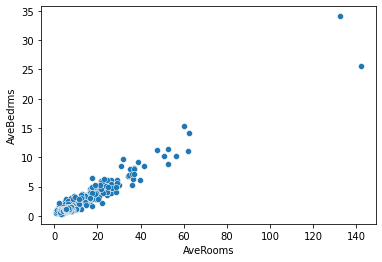

In [7]:
sns.scatterplot(data= X, x=X['AveRooms'], y=X['AveBedrms'])

In [8]:
X_drop = X.drop('AveBedrms', axis=1)

In [9]:
X_drop.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [10]:
y.isnull().sum()

0

In [11]:
(X_drop.corr() > .80).sum()

MedInc        1
HouseAge      1
AveRooms      1
Population    1
AveOccup      1
Latitude      1
Longitude     1
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)

In [13]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42, n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.545602


In [15]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [16]:
xg_reg.score(X_test,y_test)

0.7732017102123546

In [17]:
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [18]:
dt = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [19]:
# Predict the labels of the test set: preds
preds = dt.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.733301


In [20]:
dt.score(X_test,y_test)

0.5903137069733903

In [21]:
dt.get_depth()

38

In [22]:
#plt.subplots(1, 1, figsize=(10, 10))

#plot_tree(dt, feature_names=dt.feature_names_in_, filled=True)
#plt.show()

In [23]:
dt.decision_path(X_test.iloc[[0]]).toarray()

array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [24]:
for i in range(3):
    interpreta_arvore(dt, X_test, i)
    
    print("\n", "#"*80, "\n")

1a observação de teste:


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1392.0,3.877437,36.06,-119.01


Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (MedInc = 1.6812) <= 5.03)
Nó de decisão 1 : (MedInc = 1.6812) <= 3.07)
Nó de decisão 2 : (AveRooms = 4.192200557103064) <= 4.20)
Nó de decisão 3 : (AveOccup = 3.8774373259052926) > 2.44)
Nó de decisão 1149 : (MedInc = 1.6812) <= 2.22)
Nó de decisão 1150 : (AveRooms = 4.192200557103064) > 3.49)
Nó de decisão 1786 : (Latitude = 36.06) > 35.32)
Nó de decisão 2476 : (Longitude = -119.01) > -121.56)
Nó de decisão 2568 : (Latitude = 36.06) <= 37.40)
Nó de decisão 2569 : (MedInc = 1.6812) > 0.77)
Nó de decisão 2571 : (AveOccup = 3.8774373259052926) > 2.47)
Nó de decisão 2573 : (Longitude = -119.01) <= -117.99)
Nó de decisão 2574 : (Longitude = -119.01) > -120.67)
Nó de decisão 2576 : (AveOccup = 3.8774373259052926) > 2.75)
Nó de decisão 2590 : (Longitude = -119.01) > -119.23)
Nó de decisão 2680 : (Population = 1392.0) > 675.00)
Nó de decisão 2682 : (Population = 1392.0) > 1205.00)
Nó de decisão 2686 : (AveOccup = 3.87743732

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
3024,2.5313,30.0,5.039384,1565.0,2.679795,35.14,-119.46


Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (MedInc = 2.5313) <= 5.03)
Nó de decisão 1 : (MedInc = 2.5313) <= 3.07)
Nó de decisão 2 : (AveRooms = 5.039383561643835) > 4.20)
Nó de decisão 3956 : (MedInc = 2.5313) > 2.40)
Nó de decisão 7368 : (AveOccup = 2.6797945205479454) > 2.23)
Nó de decisão 7892 : (Latitude = 35.14) > 34.45)
Nó de decisão 8954 : (Longitude = -119.46) > -121.69)
Nó de decisão 9612 : (Longitude = -119.46) > -119.92)
Nó de decisão 10378 : (Latitude = 35.14) <= 37.02)
Nó de decisão 10379 : (Latitude = 35.14) > 34.86)
Nó de decisão 10421 : (Population = 1565.0) > 481.00)
Nó de decisão 10443 : (AveOccup = 2.6797945205479454) <= 3.48)
Nó de decisão 10444 : (HouseAge = 30.0) > 27.50)
Nó de decisão 10582 : (AveRooms = 5.039383561643835) <= 5.38)
Nó de decisão 10583 : (Latitude = 35.14) <= 36.36)
Nó de decisão 10584 : (AveRooms = 5.039383561643835) > 4.99)
Nó de decisão 10592 : (Population = 1565.0) <= 1571.50)
Nó de decisão 10593 : (Latitude = 35.14)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
15663,3.4801,52.0,3.977155,1310.0,1.360332,37.8,-122.44


Regras utilizada em cada nó percorrido da árvore:

Nó de decisão 0 : (MedInc = 3.4801) <= 5.03)
Nó de decisão 1 : (MedInc = 3.4801) > 3.07)
Nó de decisão 10799 : (AveOccup = 1.3603322949117342) <= 2.35)
Nó de decisão 10800 : (HouseAge = 52.0) > 24.50)
Nó de decisão 11746 : (AveOccup = 1.3603322949117342) <= 2.01)
Nó de decisão 11747 : (Latitude = 37.8) <= 38.02)
Nó de decisão 11748 : (MedInc = 3.4801) > 3.42)
Nó de decisão 11920 : (Latitude = 37.8) <= 37.82)
Nó de decisão 11921 : (Latitude = 37.8) > 37.77)
Nó de decisão 12173 : (AveOccup = 1.3603322949117342) <= 1.69)
Nó de decisão 12174 : (AveRooms = 3.977154724818276) > 3.20)
Nó de decisão 12176 : (AveOccup = 1.3603322949117342) <= 1.56)
Nó de decisão 12177 : (AveOccup = 1.3603322949117342) <= 1.56)
Nó de decisão 12178 : (Longitude = -122.44) <= -122.44)
Predição na folha: y = 5.00001
Real no set: y = 5.00001

 ################################################################################ 



In [25]:
# Instantiate rf
rf = RandomForestRegressor(
            random_state=42)

In [26]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predict the labels of the test set: preds
preds = rf.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.505594


In [28]:
rf.score(X_test,y_test)

0.8052435092986441

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [53]:
# Instanciar e fitar o KNN
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train_std, y_train)

In [54]:
# Predict the labels of the test set: preds
preds =knn.predict(X_test_std)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.648691


In [55]:
knn.score(X_test_std,y_test)

0.6793999456881181

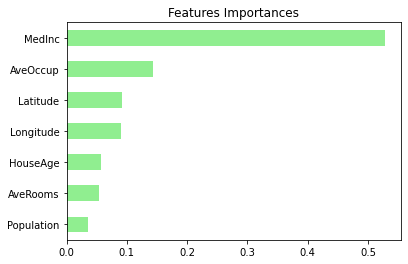

In [32]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

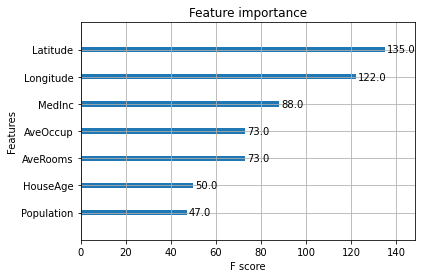

In [33]:
# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

In [34]:
xg_reg.score(X_test,y_test)

0.7732017102123546

In [35]:
xg_reg.score(X_train,y_train)

0.8196541344220327

In [36]:
rf.score(X_test,y_test)

0.8052435092986441

In [37]:
rf.score(X_train,y_train)

0.9727144418653847

In [38]:
clf = xg_reg.get_booster()
print(clf.feature_names)  

['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [39]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="regression",
                                              feature_names=clf.feature_names,
                                              class_names=['price'],
                                              random_state=42)

In [40]:
X_test.iloc[[1]]

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
3024,2.5313,30.0,5.039384,1565.0,2.679795,35.14,-119.46


In [41]:
y_test.iloc[[1]]

3024    0.458
Name: MedHouseVal, dtype: float64

In [42]:
explanation = explainer.explain_instance(X_test.iloc[1],
                                         xg_reg.predict,
                                         num_features=7)

explanation.show_in_notebook()

In [43]:
explanation.as_list()

[('MedInc <= 2.57', -0.8944244635957176),
 ('34.27 < Latitude <= 37.72', -0.2894502612549266),
 ('-121.80 < Longitude <= -118.51', 0.25710142344756587),
 ('29.00 < HouseAge <= 37.00', 0.07456739825694432),
 ('1168.00 < Population <= 1727.00', -0.0721710698608677),
 ('2.43 < AveOccup <= 2.82', -0.021600704890972915),
 ('4.45 < AveRooms <= 5.23', -0.01850940358195384)]

In [44]:
sum([x[1] for x in explanation.as_list()])

-0.9644870814799285

In [45]:
import shap

# Cria um objeto explainer
explainer = shap.Explainer(xg_reg, X_train)

# Calcula o valor de SHAP para cada observação da matrix X_train.
# Será gerado um valor de SHAP para cada feature do nosso modelo.
shap_values = explainer(X_train)

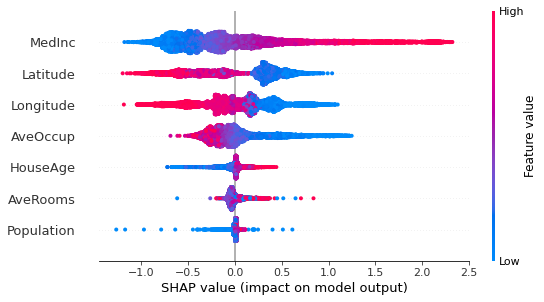

In [46]:
shap.summary_plot(shap_values, X_train, max_display=20)

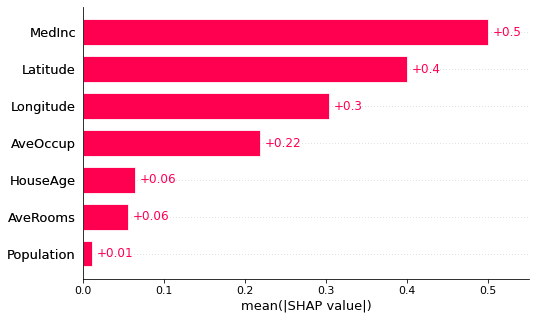

In [47]:
shap.plots.bar(shap_values)

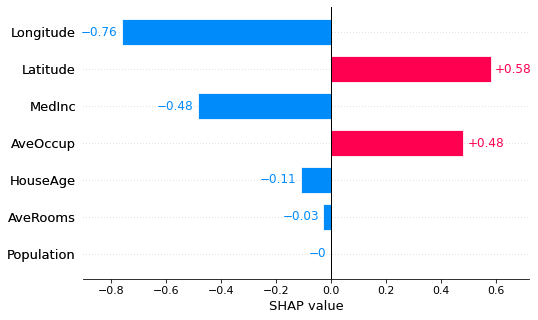

In [48]:
shap.plots.bar(shap_values[1])

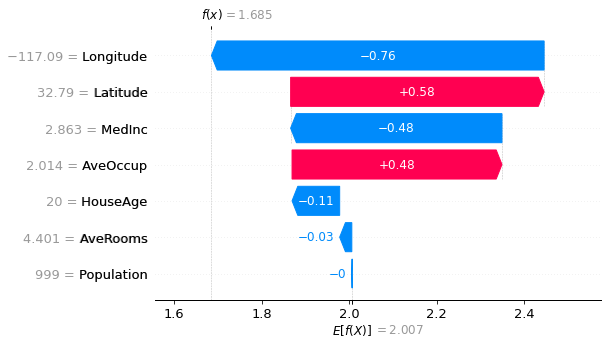

In [49]:
shap.plots.waterfall(shap_values[1])

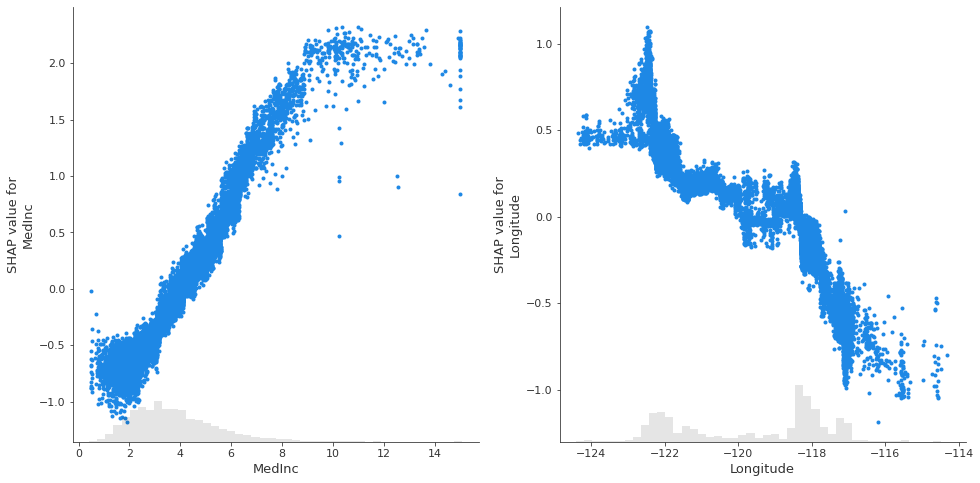

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

#SHAP scatter plots
shap.plots.scatter(shap_values[:,"MedInc"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"Longitude"],ax=ax[1])

____
____
____

## Bibliografia e aprofundamento
- [SHAP em modelo de regressão e outros gráficos](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
- [Analisando interações entre features com SHAP](https://towardsdatascience.com/analysing-interactions-with-shap-8c4a2bc11c2a)
- [SHAP: Decision Plot](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html)
- [SHAP: Heatmap Plot](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html)
- [Advanced Uses of SHAP Values](https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values/tutorial)
- [SHAP](https://www.analyticsvidhya.com/blog/2022/01/build-a-trustworthy-model-with-explainable-ai/)
- [Introduction to shap with python](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
- [Interpreting complex models with shap values](https://medium.com/@gabrieltseng/interpreting-complex-models-with-shap-values-1c187db6ec83)

____
____
____